In [1]:
# Importing libraries
import numpy as np
import math as m
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.stats import poisson

# 1 Exercise: Basic Concepts

## Task 1.1 Basic calculation and plotting

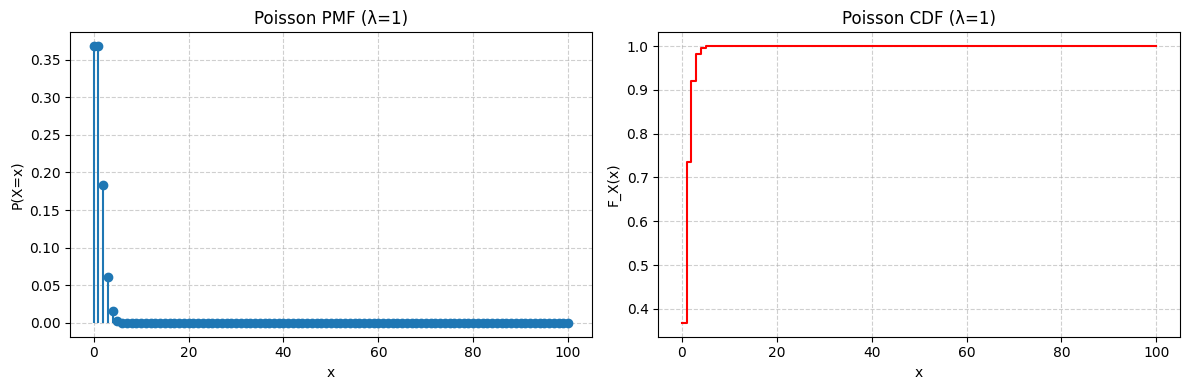

In [2]:
# --- Case (i): λ = 1 ---
lam = 1
x = np.arange(0, 101)

pmf = poisson.pmf(x, lam)
cdf = poisson.cdf(x, lam)

# Plot PMF and CDF side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PMF
axes[0].stem(x, pmf, basefmt=" ")
axes[0].set_title("Poisson PMF (λ=1)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("P(X=x)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# CDF
axes[1].step(x, cdf, where="post", color="red")
axes[1].set_title("Poisson CDF (λ=1)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F_X(x)")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


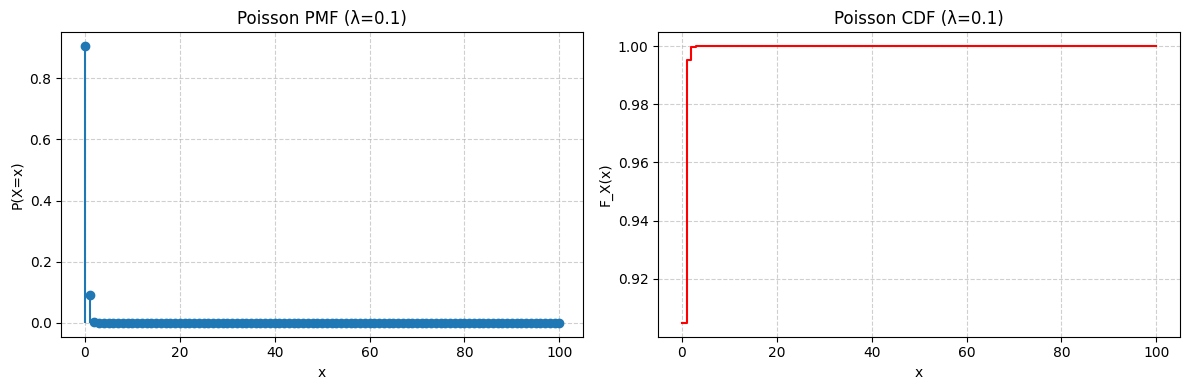

In [3]:
# --- Case (ii): λ = 0.1 ---
lam = 0.1
x = np.arange(0, 101)

pmf = poisson.pmf(x, lam)
cdf = poisson.cdf(x, lam)

# Plot PMF and CDF side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PMF
axes[0].stem(x, pmf, basefmt=" ")
axes[0].set_title("Poisson PMF (λ=0.1)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("P(X=x)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# CDF
axes[1].step(x, cdf, where="post", color="red")
axes[1].set_title("Poisson CDF (λ=0.1)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F_X(x)")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


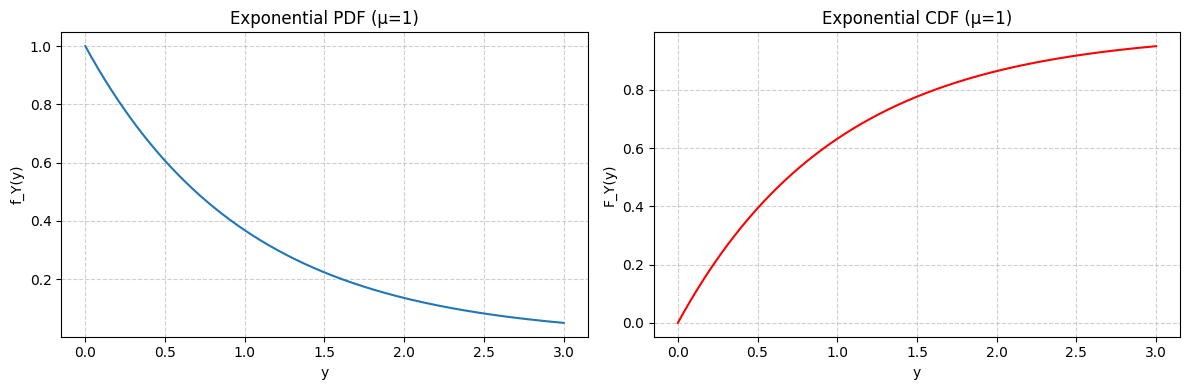

In [4]:
# Function to compute exponential PDF and CDF
def exp_pdf_cdf(mu, y):
    pdf = mu * np.exp(-mu*y) * (y >= 0)
    cdf = (1 - np.exp(-mu*y)) * (y >= 0)
    return pdf, cdf


# Case (i): μ = 1
mu = 1.0
y = np.linspace(0, 3, 600)  # good range for mu=1
pdf, cdf = exp_pdf_cdf(mu, y)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PDF
axes[0].plot(y, pdf, label="PDF")
axes[0].set_title("Exponential PDF (μ=1)")
axes[0].set_xlabel("y")
axes[0].set_ylabel("f_Y(y)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# CDF
axes[1].plot(y, cdf, color="red", label="CDF")
axes[1].set_title("Exponential CDF (μ=1)")
axes[1].set_xlabel("y")
axes[1].set_ylabel("F_Y(y)")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

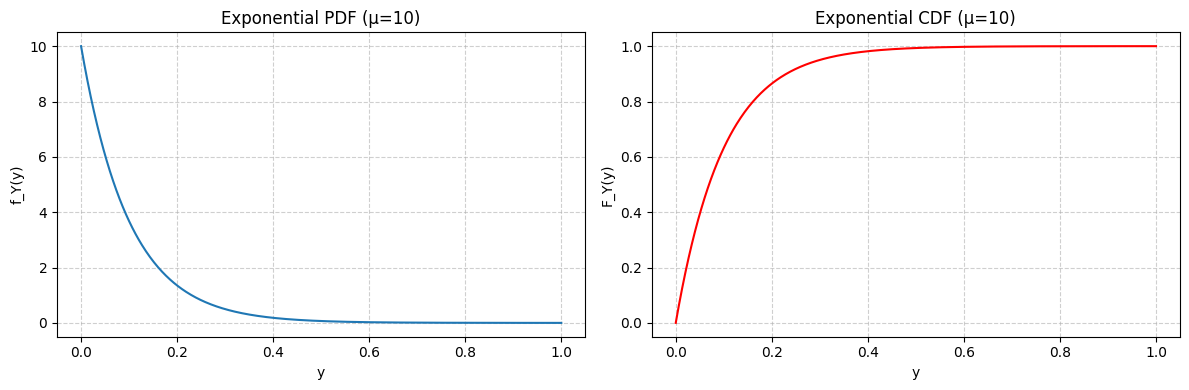

In [5]:
# Case (ii): μ = 10
mu = 10.0
y = np.linspace(0, 1, 600) 
pdf, cdf = exp_pdf_cdf(mu, y)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PDF
axes[0].plot(y, pdf, label="PDF")
axes[0].set_title("Exponential PDF (μ=10)")
axes[0].set_xlabel("y")
axes[0].set_ylabel("f_Y(y)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# CDF
axes[1].plot(y, cdf, color="red", label="CDF")
axes[1].set_title("Exponential CDF (μ=10)")
axes[1].set_xlabel("y")
axes[1].set_ylabel("F_Y(y)")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

(i) W(λ=1, μ=10) = 0.1111
(i) W(λ=0.1, μ=1) = 1.1111
Case 2 is larger.


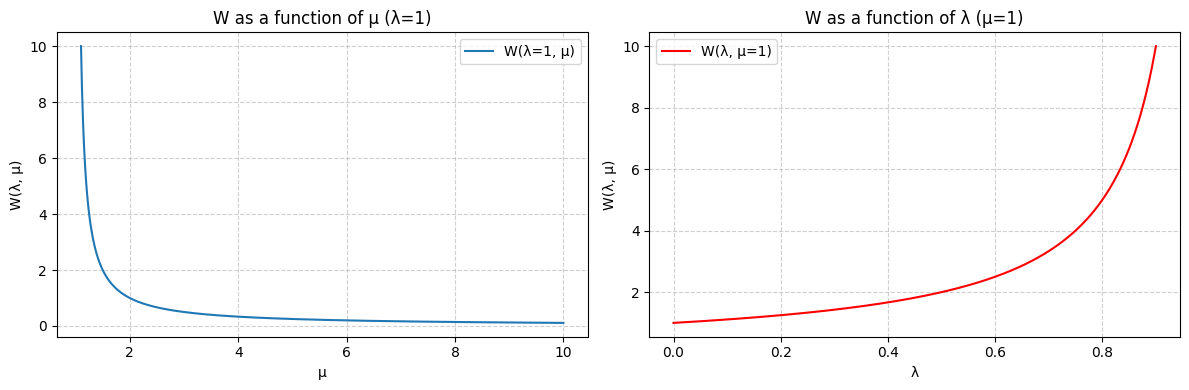

In [6]:
# Define W function
def W(lam, mu):
    return 1 / (mu - lam)

# (i) Numerical comparison
lam1, mu1 = 1, 10
lam2, mu2 = 0.1, 1

W_case1 = W(lam1, mu1)
W_case2 = W(lam2, mu2)

print(f"(i) W(λ=1, μ=10) = {W_case1:.4f}")
print(f"(i) W(λ=0.1, μ=1) = {W_case2:.4f}")

if W_case1 > W_case2:
    print("Case 1 is larger.")
else:
    print("Case 2 is larger.")


# (ii) Fix λ = 1, vary μ
# (iii) Fix μ = 1, vary λ
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# (ii) W vs μ
lam = 1
mu_vals = np.linspace(1.1, 10, 500)
W_vals_mu = W(lam, mu_vals)

axes[0].plot(mu_vals, W_vals_mu, label="W(λ=1, μ)")
axes[0].set_title("W as a function of μ (λ=1)")
axes[0].set_xlabel("μ")
axes[0].set_ylabel("W(λ, μ)")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].legend()

# (iii) W vs λ
mu = 1
lam_vals = np.linspace(0, 0.9, 500)
W_vals_lam = W(lam_vals, mu)

axes[1].plot(lam_vals, W_vals_lam, color="red", label="W(λ, μ=1)")
axes[1].set_title("W as a function of λ (μ=1)")
axes[1].set_xlabel("λ")
axes[1].set_ylabel("W(λ, μ)")
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()


## Task 1.2 Probability Theory: Fotball Scenario

We will start by defining a poisson proccess:
For a 90-minute football match between Norway and Sweden, assume both Norway and Sweden score according
to a Poisson process of intensity λ = 0.5 goal per hour.
a) What is the probability that 2 goals are scored during the match?
b) What is the probability that the result of a match between Norway and Sweden is 1:1?

We will start by defining a poisson proccess: For a 90-minute football match between Norway and Sweden, assume both Norway and Sweden score according to a Poisson process of intensity λ = 0.5 goal per hour. a) What is the probability that 2 goals are scored during the match? b) What is the probability that the result of a match between Norway and Sweden is 1:1?

In [7]:
mu = 0.75 # The expected number of goals per match
print(f"Expected number of goals in a match is {mu}")
lam = 0.5 # Poisson process intensity
print(f"Poisson process intensity is {lam}")
mu2 = mu*2 #Expected numbers of goals in two poisson processes
print(f"Expected number of goals in two matches is {mu2}")
k1 = 2 #number of goals

P_2goals = (np.exp(-mu2)*mu2**k1)/(m.factorial(k1)) #probability of two goals during the match
print(f"The probability of scoring two goals during the match is: {P_2goals:.3f}")

# Task b
# We will calculate the probability of both Norway and Sweeden scores 1 goal each
k2 = 1 #number of goals for each team

P_1goal = (np.exp(-mu)*mu**k2)/(m.factorial(k2)) #probability of one goal during the match


P_even = P_1goal*P_1goal #probability of both teams scoring one goal each
print(f"The probability of both teams scoring one goal and the match is even: {P_even:.3f}")

Expected number of goals in a match is 0.75
Poisson process intensity is 0.5
Expected number of goals in two matches is 1.5
The probability of scoring two goals during the match is: 0.251
The probability of both teams scoring one goal and the match is even: 0.126


# Task 1.3 Network Dependability: Ranking nodes based on centrality measures

In [8]:
nodes = list("abcdefg")

Gc = nx.Graph()
Gc.add_nodes_from(nodes)
Gc.add_edges_from([("a","b"),("b","c"),("c","d"),("d","e"),("e","f"),("f","g")])

Gr = Gc.copy()
Gr.add_edge("a","g")

Gd = Gc.copy()
Gd.add_edges_from([("a","c"),("e","g")])

Gt = Gd.copy()
Gt.remove_edges_from([("a","b"),("f","g")])

graphs = {"Gc": Gc, "Gr": Gr, "Gd": Gd, "Gt": Gt}

def average_degree(G):
    return 2*G.number_of_edges()/G.number_of_nodes()

# Task (a)
avg_deg = {name: average_degree(G) for name, G in graphs.items()}
print("Average node degree:")
for name, val in avg_deg.items():
    print(f"{name}: {val:.3f}")

Average node degree:
Gc: 1.714
Gr: 2.000
Gd: 2.286
Gt: 1.714


# Task 1.4 Poisson process: Bus Stop Scenario

The expected number of passengers in 15 minutes is 5


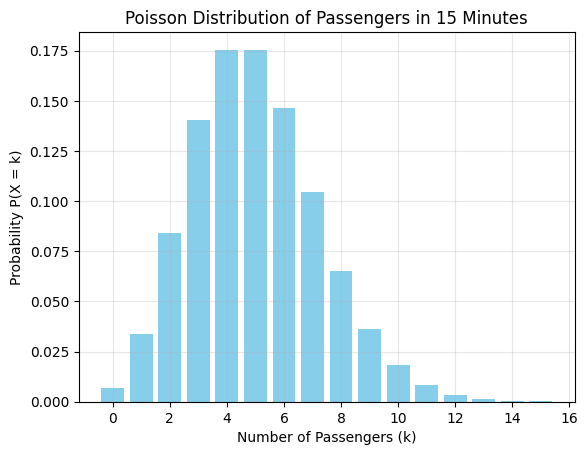

Most likely number of passengers: 4


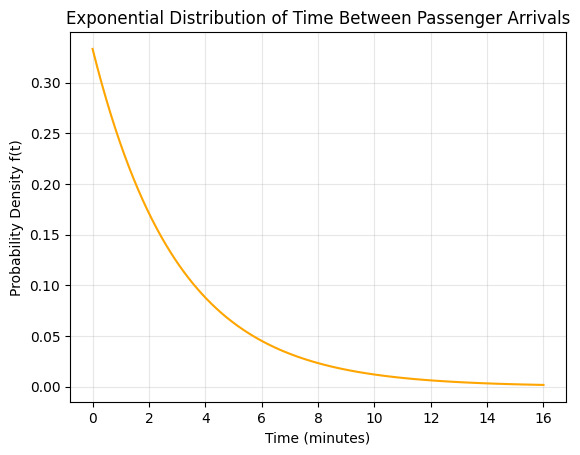

The average inter-arrival time is 3.0 minutes


In [9]:
# Task a
t = 15
lamb = 1/3 # Poisson process intensity (1 passenger arrives every 3 minutes)
mu = lamb*t # The expected number of passengers in 15 minutes 
print(f"The expected number of passengers in {t} minutes is {int(mu)}")
k_values = np.arange(0, 16) # k values from 0 to 15
probabilities = []


def poisson_prob(mu, k): #Function to calculate poisson probability
    return (np.exp(-mu)*mu**k)/(m.factorial(k))

for k in k_values:
    prob = poisson_prob(mu, k) # Calculate the probability for each k nhbhh
    probabilities.append(prob) # Store the probability
         
plt.bar(k_values, probabilities, color='skyblue')
plt.xlabel('Number of Passengers (k)')
plt.ylabel('Probability P(X = k)')
plt.title('Poisson Distribution of Passengers in 15 Minutes')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Most likely number of passengers: {k_values[np.argmax(probabilities)]}")

# Task b
def time_distribution(lamb, t): #Function to calculate the PDF of exponential distribution
    return lamb * np.exp(-lamb * t) # PDF formula

t_values = np.linspace(0, 16, 100) # Time values from 0 to 16 minutes
pdf_values = time_distribution(lamb, t_values) # Calculate the PDF values

plt.plot(t_values, pdf_values, color='orange') # Plot the PDF (Probability Density Function)
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density f(t)')
plt.title('Exponential Distribution of Time Between Passenger Arrivals')
plt.grid(True, alpha=0.3)
plt.show()

mean_time = 1/lamb # Mean time between arrivals
print(f"The average inter-arrival time is {mean_time} minutes")

## Task 1.5 Stochastic Process: Multiple Access
Consider a digital satellite communication system with constant packet length. The satellite is in a geostationary
position about 36000 km above equator, so the round trip delay is about 280 ms. The time axes is divided
into slots of fixed duration, h, corresponding to the packet length. The individual terminal (earth station)
transmits packets so that they are synchronized with the time slots. All packets generated during a time slot
are transmitted in the next time slot. The transmission of a packet is only correct if it is the only packet being
transmitted in a time slot. If more packets are transmitted simultaneously, we have a collision and all packets
are lost and must be retransmitted. All earth stations receive all packets and can thus decide whether a packet
is transmitted correctly. Due to the time delay, the earth stations transmit packets independently.

a) If the total arrival process is a Poisson process (rate λ), which distribution does the number of packets in
each time slot follow? Write down the pdf for the distribution.
b) What is the probability of correct transmission?
c) The probability of correct transmission has an optimum when the derivative with respect to λh is zero.
Calculate the value of the product λh and use it to determine the maximum utilization of the channel.

a) If the arrival process is a Poisson process, the number of packets in each time slot follows a poisson distribution. 
$$ P(X = k) = e^{-\lambda h} \frac{(\lambda h)^{-k}}{k!} $$

b) A correct transmission is defined as only one packet send each time slot. This gives P(X = 1)
$$ P(X = 1) = e^{-\lambda h} (\lambda h) $$

c) We first have to find the derivative of P(\mu):
$$ \frac {d}{d\mu} P(\mu)= -e^{-\mu} \cdot \mu + e^{-\mu}\cdot 1$$
$$ \frac {d}{d\mu} P(\mu)= e^{-\mu}\cdot (1-\mu)$$

To find the maximum, we det the derivative equals to 0:
$$ \frac {d}{d\mu} P(\mu)= e^{-\mu}\cdot (1-\mu) = 0$$
That gives $$ \mu = 1$$ and $$ \lambda h = 1$$ Which we can plug in the formula:

In [10]:
mu = 1
P_1 = (np.exp(-mu) * (mu)**1) / m.factorial(1)
print(f"P(Correct): {P_1:.3f}")

P(Correct): 0.368


The channel has a maximum utilization of aproximatly 0,368 or 36,8%

# Task 1.6 Little’s Theorem: University Study Programs

In [11]:
l_bdigsec = 45*3.5
l_mtkom = 72*6
l_mdigsec = 28*2.5
l_mis = 23*2.5
l_phd = 5*4
print(f"a) \nThe average number of students for each study program is: \n BDIGSEC = {l_bdigsec} \n MTKOM = {l_mtkom} \n MDIGSEC = {l_mdigsec} \n MIS = {l_mis} \n PhD = {l_phd} \n")

l_sum = l_bdigsec + l_mtkom + l_mdigsec + l_mis + l_phd
print(f"The total number of average students at the department is {l_sum}")

a) 
The average number of students for each study program is: 
 BDIGSEC = 157.5 
 MTKOM = 432 
 MDIGSEC = 70.0 
 MIS = 57.5 
 PhD = 20 

The total number of average students at the department is 737.0


a) The average number of students for each study program is: BDIGSEC = 157.5 MTKOM = 432 MDIGSEC = 70.0 MIS = 57.5 PhD = 20

The total number of average students at the department is 737.0

In [12]:
lam_sum = 45 + 72 + 28 + 23 + 5
print(f"b) \nAverage number of students arriving each year is {lam_sum}")

b) 
Average number of students arriving each year is 173


b) Average number of students arriving each year is 173

In [13]:
w_hat = l_sum / lam_sum
print(f"c) \nAverage time spent by a student is {w_hat}")

c) 
Average time spent by a student is 4.2601156069364166


c) Average time spent by a student is 4.2601156069364166